## Analyses related to learning and experience

In [1]:
import json
import csv
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats

In [3]:
# Open full filtered dataset
with open('../saved_analyses_updated/AI_filter.txt', 'r') as filehandle:  
    games_filtered = json.load(filehandle)

## Calculate Bayesian Elo Ratings (100+ games)

In [5]:
# Open num games per user
with open('../saved_analyses_updated/numgames_user.txt', 'r') as filehandle:  
    num_games = json.load(filehandle)
    
# Put all users with at least 100 games in a set
over100_users = set()
for user in num_games:
    if num_games[user] >= 100:
        over100_users.add(user)
        
# Now create a dictionary with user IDs and each game path that corresponds to the user
over100_dict = dict((el,[]) for el in over100_users)

for game in games_filtered:
    ID = game[36:46]
    if ID in over100_users:
        over100_dict[ID].append(game)

In [34]:
# Write each cumulative block as a new user to a different PNG file (0 to 100 in intervals of 20)
block_start = 80
block_end = 100
with open("eloinput_block"+str(block_end)+".txt", "w") as elo_input:
    # Loop through each game, open the data file
    for userID, path_list in over100_dict.items():
        
        for i in range(block_start,block_end):
            game = path_list[i]
            with(open(game)) as f:
                data = json.load(f)

                # Set the new name for the user/block combo
                human_name = str(data['bbuid'])+"_block"+str(block_end)
                
                # Grab the AI name
                comp_name = str(data['data']['rankinit'])

                # Get the game outcome
                try:
                    game_outcome = data['data']['rounds'][-1]['analytic']['events'][-1]['resultString'] 
                except:
                    print(game)

                # Given the result set the correct format outcome
                if game_outcome == "Win":
                    result_text = "1-0"
                elif game_outcome == "Lose":
                    result_text = "0-1"
                elif game_outcome == "Draw":
                    result_text = "1/2-1/2"

                # Write the results to our output file
                elo_input.write('[White "' + human_name + '"]\n[Black "' + comp_name + '"]\n[Result "' + 
                                    result_text + '"]\n' + result_text + '\n\n')

In [35]:
# Now write out a new file with all games in the data set that ignores the old users

with open("elo_input.txt", "w") as elo_input:
    # Loop through each game, open the data file
    for game in games_filtered:
        with(open(game)) as f:
            data = json.load(f)

            # Grab the user and AI names
            human_name = str(data['bbuid'])
            comp_name = str(data['data']['rankinit'])
            
            if human_name in over100_dict.keys():
                pass
            
            else:

                # Get the game outcome
                try:
                    game_outcome = data['data']['rounds'][-1]['analytic']['events'][-1]['resultString'] 
                except:
                    print(game)

                # Given the result set the correct format outcome
                if game_outcome == "Win":
                    result_text = "1-0"
                elif game_outcome == "Lose":
                    result_text = "0-1"
                elif game_outcome == "Draw":
                    result_text = "1/2-1/2"

                # Write the results to our output file
                elo_input.write('[White "' + human_name + '"]\n[Black "' + comp_name + '"]\n[Result "' + 
                                    result_text + '"]\n' + result_text + '\n\n')

/Volumes/Samsung_T5/Peak/20190414/G/GtCfrEbctx-1538226896-537


In [36]:
# Now concatenate the text files and calculate elos in terminal
path = '/Users/ionatankuperwajs/Desktop/MaLab/Peak/bayeselo/game_outcomes/'
filenames = ['elo_input.txt', 'eloinput_block20.txt', 'eloinput_block40.txt', 'eloinput_block60.txt', 
            'eloinput_block80.txt', 'eloinput_block100.txt']
with open(path + 'concatenated', 'w') as outfile:
    for fname in filenames:
        with open(path + fname) as infile:
            for line in infile:
                outfile.write(line)

In [12]:
# Read in calculated elos
data = pd.read_csv('/Users/ionatankuperwajs/Desktop/MaLab/Peak/bayeselo/blocked_ratings.txt', delim_whitespace=True)

In [22]:
data

,Rank,Name,Rating,Δ,+,-,#,Σ,Σ%,W,L,D,W%,=%,OppR
0,1,OZwNNoTZET,3879,0.0,318,318,53,53.0,100.0,53,0,0,100.0,0.0,3172
1,2,dvdkSunuuy,3876,2.5,318,318,61,61.0,100.0,61,0,0,100.0,0.0,3147
2,3,MitWwmkvVC,3869,6.8,318,318,51,51.0,100.0,51,0,0,100.0,0.0,3167
3,4,XbfNyYiYyK,3861,8.5,318,318,56,56.0,100.0,56,0,0,100.0,0.0,3144
4,5,msZBbmjBxp,3858,3.0,318,318,50,50.0,100.0,50,0,0,100.0,0.0,3161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279994,1279995,tKcBSnIoyY_block60,2447,-0.0,323,323,20,0.0,0.0,0,20,0,0.0,0.0,3050
1279995,1279996,tKcBSnIoyY_block100,2447,-0.0,323,323,20,0.0,0.0,0,20,0,0.0,0.0,3050
1279996,1279997,tKcBSnIoyY_block80,2447,-0.0,323,323,20,0.0,0.0,0,20,0,0.0,0.0,3050
1279997,1279998,LarwNjWBGT,2446,0.3,325,325,15,0.0,0.0,0,15,0,0.0,0.0,3003


In [41]:
# Grab the rows that have the blocked users
blocked_data_20 = data[data['Name'].str.contains('block20', regex=False, case=False, na=False)]
blocked_data_40 = data[data['Name'].str.contains('block40', regex=False, case=False, na=False)]
blocked_data_60 = data[data['Name'].str.contains('block60', regex=False, case=False, na=False)]
blocked_data_80 = data[data['Name'].str.contains('block80', regex=False, case=False, na=False)]
blocked_data_100 = data[data['Name'].str.contains('block100', regex=False, case=False, na=False)]

In [42]:
# Calculate the mean and sem of each block
mean_20 = blocked_data_20['Rating'].mean()
sem_20 = blocked_data_20['Rating'].sem()

mean_40 = blocked_data_40['Rating'].mean()
sem_40 = blocked_data_40['Rating'].sem()

mean_60 = blocked_data_60['Rating'].mean()
sem_60 = blocked_data_60['Rating'].sem()

mean_80 = blocked_data_80['Rating'].mean()
sem_80 = blocked_data_80['Rating'].sem()

mean_100 = blocked_data_100['Rating'].mean()
sem_100 = blocked_data_100['Rating'].sem()

means = [mean_20, mean_40, mean_60, mean_80, mean_100]
sems = [sem_20, sem_40, sem_60, sem_80, sem_100]

In [36]:
# Increase figure size a bit
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})

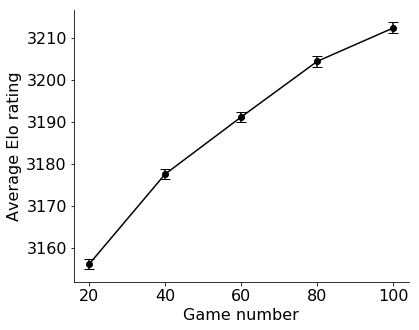

In [44]:
# Plot average
fig, ax = plt.subplots()
ax.errorbar(np.arange(20,101,20), means, sems, capsize=5,marker='o', color='black')
ax.set_xlabel('Game number')
ax.set_ylabel('Average Elo rating')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [45]:
# Export ratings to num_players by 5 matrix for plotting
ratings_matrix = np.column_stack((blocked_data_20['Rating'].to_numpy(),blocked_data_40['Rating'].to_numpy(),
                                 blocked_data_60['Rating'].to_numpy(), blocked_data_80['Rating'].to_numpy(),
                                 blocked_data_100['Rating'].to_numpy()))

In [46]:
ratings_matrix.shape

(11287, 5)

In [47]:
ratings_matrix

array([[3674, 3716, 3776, 3776, 3776],
       [3670, 3715, 3776, 3776, 3776],
       [3660, 3706, 3776, 3776, 3776],
       ...,
       [2546, 2572, 2646, 2563, 2627],
       [2537, 2558, 2638, 2547, 2547],
       [2400, 2447, 2447, 2447, 2447]])

In [48]:
np.savetxt('peak_ratings', ratings_matrix)

In [29]:
# Pull out the 30 users for the paper and check their elos over time
data_paper = data[data['Name'].str.contains('|'.join(list(over100_sample.keys())))]

# Grab the rows that have the blocked users
paper_data_20 = data_paper[data_paper['Name'].str.contains('block20', regex=False, case=False, na=False)]
paper_data_40 = data_paper[data_paper['Name'].str.contains('block40', regex=False, case=False, na=False)]
paper_data_60 = data_paper[data_paper['Name'].str.contains('block60', regex=False, case=False, na=False)]
paper_data_80 = data_paper[data_paper['Name'].str.contains('block80', regex=False, case=False, na=False)]
paper_data_100 = data_paper[data_paper['Name'].str.contains('block100', regex=False, case=False, na=False)]

# Calculate the mean and sem of each block
mean_20_paper = paper_data_20['Rating'].mean()
sem_20_paper = paper_data_20['Rating'].sem()

mean_40_paper = paper_data_40['Rating'].mean()
sem_40_paper = paper_data_40['Rating'].sem()

mean_60_paper = paper_data_60['Rating'].mean()
sem_60_paper = paper_data_60['Rating'].sem()

mean_80_paper = paper_data_80['Rating'].mean()
sem_80_paper = paper_data_80['Rating'].sem()

mean_100_paper = paper_data_100['Rating'].mean()
sem_100_paper = paper_data_100['Rating'].sem()

means_paper = [mean_20_paper, mean_40_paper, mean_60_paper, mean_80_paper, mean_100_paper]
sems_paper = [sem_20_paper, sem_40_paper, sem_60_paper, sem_80_paper, sem_100_paper]

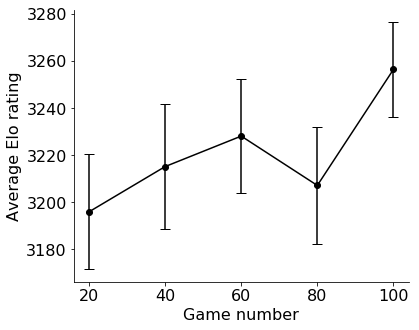

In [31]:
# Plot average
fig, ax = plt.subplots()
ax.errorbar(np.arange(20,101,20), means_paper, sems_paper, capsize=5,marker='o', color='black')
ax.set_xlabel('Game number')
ax.set_ylabel('Average Elo rating')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Write out games for model-fitting

In [5]:
# Pick a small subset of the users that have played 100+ games
over100_sample = dict(random.sample(over100_dict.items(), 30))

In [18]:
list(over100_sample.keys())

['ZAhCMtLOSa',
 'kaGdDjZqWg',
 'YsUzdeYobm',
 'ylDZcLSGzi',
 'vxzuIORJKX',
 'PnNILDnLdX',
 'WASWCjvkSf',
 'eOOVawOFxb',
 'AREwvNqTxc',
 'nyhNeYdVsh',
 'tnGMrUGByz',
 'lcMQOJykbE',
 'PIBgFMOgkZ',
 'grSuRIZKsB',
 'beGvAksWzP',
 'PbAYOdgWyk',
 'qFpKOzFdKp',
 'SDcMeNjEjm',
 'TEjfRKZcni',
 'OZvufMjxqA',
 'LzYOQEtWyg',
 'kalkupPyEF',
 'niBZloyGmz',
 'ovIeXCoase',
 'dseDAhZdPo',
 'DsMabUjLzp',
 'GVpQmKgSvR',
 'DbdTTxgeAE',
 'kplBsqsGaT',
 'vPktHzWCfa']

In [6]:
# Function to get all of the moves in a game and return them in a list
def get_moves_from_json(data):
    return [d['positionValue'] for d in data['data']['rounds'][-1]['analytic']['events'] if d['stateString']=='Turn']

In [7]:
# Function to get the total game length (number of moves + timed out moves) for a single game
def get_game_length(data):
    game_length = 0
    for i in data['data']['rounds'][-1]['analytic']['events']:
        if i['stateString'] == 'Turn':
            game_length +=1
    return game_length

In [8]:
# Function to return integer code for a list of moves
def encode_move_list(moves):
    return np.sum([2**m for m in moves])

In [15]:
# Loop through each game to get the info we need: board state, chosen move, response time, player ID for each move
block_start = 80
block_end = 100
for userID, path_list in over100_sample.items():
    player = userID + str(block_end)
    with open(player + '.csv','w') as f1:
        writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
        
        for i in range(block_start,block_end):
            game = path_list[i]
            with(open(game)) as f:
                data = json.load(f)

                # Get all moves in a list
                all_moves = get_moves_from_json(data)

                # Get game length
                game_length = get_game_length(data)

                # Loop through each turn, get info that's left, and write to a new line in the csv
                for turn in range(0,game_length,2):
                    if data['data']['rounds'][-1]['analytic']['events'][turn]['stateString'] == 'Pause':
                        print(player, data['data']['rounds'][turn]['analytic']['events'][turn])
                    elif data['data']['rounds'][-1]['analytic']['events'][turn]['stateString'] == 'Resume':
                        print(player, data['data']['rounds'][turn]['analytic']['events'][turn])
                    elif data['data']['rounds'][-1]['analytic']['events'][turn]['playerString'] == 'player':
                        response_time = data['data']['rounds'][turn]['duration']/1000
                        move = int(encode_move_list([all_moves[turn]]))
                        board_state = all_moves[:turn]
                        black_code = int(encode_move_list(board_state[::2]))
                        white_code = int(encode_move_list(board_state[1::2]))
                        writer.writerow([black_code,white_code,"Black",move,response_time,player])

YsUzdeYobm100 {'stateString': 'Pause'}
grSuRIZKsB100 {'stateString': 'Resume'}
qFpKOzFdKp100 {'stateString': 'Pause'}
DsMabUjLzp100 {'stateString': 'Resume'}
kplBsqsGaT100 {'stateString': 'Pause'}


## Analyze parameters over time
Post model-fitting, read in parameter values for users and see if they improve

In [116]:
# Load in the files and save a list of principal variation per user/experience group level (averaged)
path = '/Users/ionatankuperwajs/Desktop/4-in-a-row/Data/peak/splits/'

params_20 = []
params_40 = []
params_60 = []
params_80 = []
params_100 = []

for user in range(50):
    direc  = path+str(user+1)+'/'
    data = pd.read_csv(direc+'1.csv', delim_whitespace=True, header=None)
    exp_group = data[6][0][-2]
    sum_params = np.zeros((1,10))
    for group in range(5):
        params_array = pd.read_csv(direc+'params'+str(group+1)+'.csv', header=None)
        sum_params += params_array.values[0]
    if exp_group == '0':
        params_100.append(sum_params/5)
    elif exp_group == '2':
        params_20.append(sum_params/5)
    elif exp_group == '4':
        params_40.append(sum_params/5)
    elif exp_group == '6':
        params_60.append(sum_params/5)
    elif exp_group == '8':
        params_80.append(sum_params/5)

In [117]:
# Initialize a new array for the averages and sem
means = np.zeros((5, 10))
sem = np.zeros((5, 10))

means[0] = np.mean(np.array(params_20), axis=0)
sem[0] = stats.sem(np.array(params_20), axis=0)

means[1] = np.mean(np.array(params_40), axis=0)
sem[1] = stats.sem(np.array(params_40), axis=0)

means[2] = np.mean(np.array(params_60), axis=0)
sem[2] = stats.sem(np.array(params_60), axis=0)

means[3] = np.mean(np.array(params_80), axis=0)
sem[3] = stats.sem(np.array(params_80), axis=0)

means[4] = np.mean(np.array(params_100), axis=0)
sem[4] = stats.sem(np.array(params_100), axis=0)

In [120]:
# Grab the feature drop rates
fd_means = means[:,2]
fd_sem = sem[:,2]

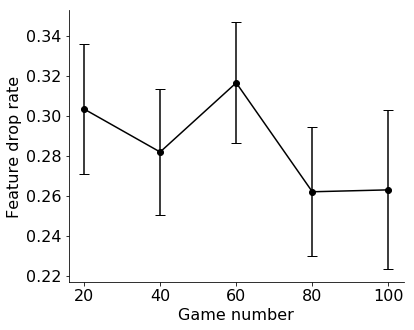

In [121]:
# Plot average
fig, ax = plt.subplots()
ax.errorbar(np.arange(20,101,20), fd_means, fd_sem, capsize=5,marker='o', color='black')
ax.set_xlabel('Game number')
ax.set_ylabel('Feature drop rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Concatenate parameters to calculate depth of principal variation
Post-fitting, then compute this on cluster with output file

In [2]:
def expand_params(theta):
    thresh = theta[0];
    delta = theta[2];
    w_center = theta[5];
    w = theta[6:10]
    lapse = theta[3];
    c_act = theta[4];
    gamma = theta[1];
    return np.hstack([[10000,thresh,gamma,lapse,1,1,w_center],
                     np.tile(w,4),
                     [0],
                     c_act*np.tile(w,4),
                     [0],
                     [delta]*17])

In [3]:
direc = '/Users/ionatankuperwajs/Desktop/4-in-a-row/Data/peak_paper/'
behavior_names = list(range(150))

params_short = np.vstack([np.loadtxt(direc + '/splits/' + str(i+1) + '/params' + str(g) + '.csv',delimiter=',') 
           for i in range(len(behavior_names)) for g in range(1,6)])
params = np.vstack([expand_params(np.loadtxt(direc + '/splits/' + str(i+1) + '/params' + str(g) + '.csv',delimiter=',')) 
           for i in range(len(behavior_names)) for g in range(1,6)])
np.savetxt(direc + 'params_peak_final_long.txt',params,fmt = '%6f')

## Analyze depth of principal variation

In [74]:
# Load in the files and save a list of principal variation per user/experience group level (averaged)
path = '/Users/ionatankuperwajs/Desktop/4-in-a-row/Data/peak/splits/'

pv_20 = []
pv_40 = []
pv_60 = []
pv_80 = []
pv_100 = []

for user in range(150):
    direc  = path+str(user+1)+'/'
    data = pd.read_csv(direc+'1.csv', delim_whitespace=True, header=None)
    exp_group = data[6][0][-2]
    for group in range(5):
        pv_array = np.maximum(np.loadtxt(direc+'pv_depth_'+str(group+1)+'.txt')-2,0)
        pv_per_move = pv_array.mean()
        if exp_group == '0':
            pv_100.append(pv_per_move)
        elif exp_group == '2':
            pv_20.append(pv_per_move)
        elif exp_group == '4':
            pv_40.append(pv_per_move)
        elif exp_group == '6':
            pv_60.append(pv_per_move)
        elif exp_group == '8':
            pv_80.append(pv_per_move)

In [75]:
# Take the mean and sem of the principal variations
pv_means = [np.mean(pv_20), np.mean(pv_40), np.mean(pv_60), np.mean(pv_80), np.mean(pv_100)]
pv_sem = [stats.sem(pv_20), stats.sem(pv_40), stats.sem(pv_60), stats.sem(pv_80), stats.sem(pv_100)]

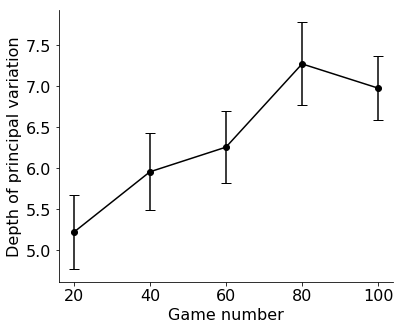

In [76]:
# Plot
fig, ax = plt.subplots()
ax.errorbar(np.arange(20,101,20), pv_means, pv_sem, capsize=5,marker='o', color='black')
ax.set_xlabel('Game number')
ax.set_ylabel('Depth of principal variation')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Calculate Bayesian Elo Ratings for users in paper

In [4]:
paper_users = {'ZAhCMtLOSa','kaGdDjZqWg','YsUzdeYobm','ylDZcLSGzi','vxzuIORJKX','PnNILDnLdX','WASWCjvkSf','eOOVawOFxb',
               'AREwvNqTxc','nyhNeYdVsh','tnGMrUGByz','lcMQOJykbE','PIBgFMOgkZ','grSuRIZKsB','beGvAksWzP','PbAYOdgWyk',
               'qFpKOzFdKp','SDcMeNjEjm','TEjfRKZcni','OZvufMjxqA','LzYOQEtWyg','kalkupPyEF','niBZloyGmz','ovIeXCoase',
               'dseDAhZdPo','DsMabUjLzp','GVpQmKgSvR','DbdTTxgeAE','kplBsqsGaT','vPktHzWCfa'}
        
# Now create a dictionary with user IDs and each game path that corresponds to the user
paper_dict = dict((el,[]) for el in paper_users)

for game in games_filtered:
    ID = game[36:46]
    if ID in paper_users:
        paper_dict[ID].append(game)

In [101]:
# Write each cumulative block as a new user to a different PNG file (0 to 100 in intervals of 20)
block_start = 80
block_end = 100
with open("eloinput_paper_block"+str(block_end)+".txt", "w") as elo_input:
    # Loop through each game, open the data file
    for userID, path_list in paper_dict.items():
        
        for i in range(block_start,block_end):
            game = path_list[i]
            with(open(game)) as f:
                data = json.load(f)

                # Set the new name for the user/block combo
                human_name = str(data['bbuid'])+"_block"+str(block_end)
                
                # Define the AI name
                min_range = data['data']['rounds'][-1]['problem']['ai_difficulty_min']
                max_range = data['data']['rounds'][-1]['problem']['ai_difficulty_max']
                comp_name = 'peak_opp_'+str(min_range)+'_'+str(max_range)

                # Get the game outcome
                try:
                    game_outcome = data['data']['rounds'][-1]['analytic']['events'][-1]['resultString'] 
                except:
                    print(game)

                # Given the result set the correct format outcome
                if game_outcome == "Win":
                    result_text = "1-0"
                elif game_outcome == "Lose":
                    result_text = "0-1"
                elif game_outcome == "Draw":
                    result_text = "1/2-1/2"

                # Write the results to our output file
                elo_input.write('[White "' + human_name + '"]\n[Black "' + comp_name + '"]\n[Result "' + 
                                    result_text + '"]\n' + result_text + '\n\n')

In [12]:
# Now write out a new file with all games in the data set that ignores the old users

with open("elo_input_paper.txt", "w") as elo_input:
    # Loop through each game, open the data file
    for game in games_filtered:
        with(open(game)) as f:
            data = json.load(f)

            # Grab the user and AI names
            human_name = str(data['bbuid'])
            comp_name = str(data['data']['rankinit'])
            
            if human_name in paper_dict.keys():
                pass
            
            else:

                # Get the game outcome
                try:
                    game_outcome = data['data']['rounds'][-1]['analytic']['events'][-1]['resultString'] 
                except:
                    print(game)

                # Given the result set the correct format outcome
                if game_outcome == "Win":
                    result_text = "1-0"
                elif game_outcome == "Lose":
                    result_text = "0-1"
                elif game_outcome == "Draw":
                    result_text = "1/2-1/2"

                # Write the results to our output file
                elo_input.write('[White "' + human_name + '"]\n[Black "' + comp_name + '"]\n[Result "' + 
                                    result_text + '"]\n' + result_text + '\n\n')

/Volumes/Samsung_T5/Peak/20190414/G/GtCfrEbctx-1538226896-537


In [102]:
# Now concatenate the text files and calculate elos in terminal
path = '/Users/ionatankuperwajs/Desktop/MaLab/Peak/bayeselo/game_outcomes_paper/'
filenames = ['eloinput_paper_block20.txt', 'eloinput_paper_block40.txt',
            'eloinput_paper_block60.txt', 'eloinput_paper_block80.txt', 'eloinput_paper_block100.txt']
with open(path + 'concatenated', 'w') as outfile:
    for fname in filenames:
        with open(path + fname) as infile:
            for line in infile:
                outfile.write(line)

## Compute RT over experience for users in paper

In [24]:
keys = [20,40,60,80,100]
dur_dict = {key: [] for key in keys}

In [32]:
block_start = 80
block_end = 100
for userID, path_list in paper_dict.items():
    for i in range(block_start,block_end):
        game = path_list[i]
        with(open(game)) as f:
            data = json.load(f)
            for turn in range(len(data['data']['rounds'])):
                if turn % 2 == 0:
                    # Grab the turn duration and position played
                    duration = data['data']['rounds'][turn]['duration']
                    dur_dict[block_end].append(duration/1000)
            
        

In [34]:
# Take the mean and sem of the turn durations
dur_means = [np.mean(dur_dict[20]), np.mean(dur_dict[40]), np.mean(dur_dict[60]), np.mean(dur_dict[80]), np.mean(dur_dict[100])]
dur_sem = [stats.sem(dur_dict[20]), stats.sem(dur_dict[40]), stats.sem(dur_dict[60]), stats.sem(dur_dict[80]), stats.sem(dur_dict[100])]

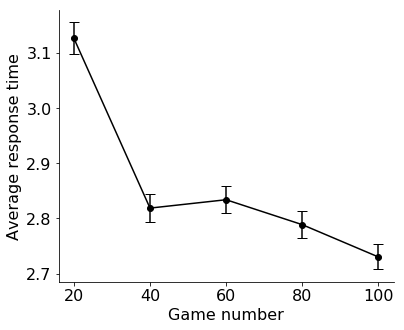

In [37]:
# Plot
fig, ax = plt.subplots()
ax.errorbar(np.arange(20,101,20), dur_means, dur_sem, capsize=5,marker='o', color='black')
ax.set_xlabel('Game number')
ax.set_ylabel('Average response time')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()